# K-means clustering: intuitive explanation

The notebook provides an intuitive description and explanation of the k-means clustering technique. A synthetic dataset will be used to identify clusters manually.


## Acknowledgments

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [92]:
# Import the packages that we will be using
import numpy as np                  # For arrays, matrices, and functions to operate on them
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots


# Importing data

In [93]:
# Create synthetic data
d = {'x1': [2, 4, 2, 6, 6],
     'x2': [2, 3, 4, 6, 5]}

# Our data consists of 5 points and 2 variables

# Construct the dataframe
dataset = pd.DataFrame(data=d)


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [94]:
dataset

,x1,x2
0,2,2
1,4,3
2,2,4
3,6,6
4,6,5


2. Scatter plot of the data

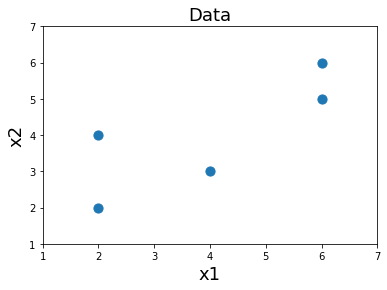

In [95]:
plt.scatter(dataset.x1,dataset.x2, s=84)
plt.title('Data', fontsize=18)
plt.xlabel('x1', fontsize=18)
plt.ylabel('x2', fontsize=18)

plt.xlim(1,7)
plt.ylim(1,7)

plt.show()

Note that for this dataset we do not know in advance the cluster/group/class to which each point belongs to, and that is what we want to do: to identify the existing cluster/group/class, i.e., to assing each point to a cluster/group/class

3. Preprocessing the data

No preprocessing is required

# Kmeans clustering

Intuitive explanation

### Initialize/Preliminaries

In [96]:
# Compute the number of points in the dataset
index   = dataset.index
Npoints = len(index)

print(Npoints)

5


## 1: Specify the number of clusters

Define the number $K$ of clusters

In [97]:
# Let's assume our data has two clusters (note that the rest of the code is for K=2)
K  = 2

## 2: Initialize the centroids of the clusters

Randomly initialize the centroids of the clusters $C_1, C_2, \cdots, C_K$

In [98]:
# Let's initialize the centroids for the K=2 clusters (this has to be done randomly)

# Let's do it manually
C1 = np.array([1.5, 3.0]) # 1st Centroid
C2 = np.array([3.0, 3.0]) # 2nd Centroid

# Print centroids
print(C1)
print(C2)

#C  = np.array([C1,C2])
#print(C)

[1.5 3. ]
[3. 3.]


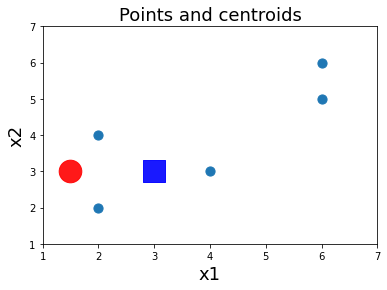

In [99]:
# Plot the points and the centroids
plt.scatter(dataset.x1,dataset.x2, marker='o', s=84)

plt.scatter(C1[0], C1[1], color='r', marker='o', label='Centroid 1', s=512, alpha=0.9)
plt.scatter(C2[0], C2[1], color='b', marker='s', label='Centroid 2', s=512, alpha=0.9)

plt.title('Points and centroids', fontsize=18)
plt.xlabel('x1', fontsize=18)
plt.ylabel('x2', fontsize=18)

plt.xlim(1,7)
plt.ylim(1,7)

plt.show()

## 3:  Repeat the following


Define the current centroids

In [100]:
#C1 = C1new
#C2 = C2new

## 4: Assign each point  to its closest centroid

Compute the distance of each data point to each centroid

Assign each point to the centroid with the minimum Euclidean distance

Euclidean distance:
- Consider two points $x=(x_1,x_2)$ and  $y=(y_1,y_2)$.
- The Euclidean distance between these two points is 
$ d = \sqrt {\left( {x_1 - x_2 } \right)^2 + \left( {y_1 - y_2 } \right)^2 } $


In [101]:
# Compute the distance of each data point to each centroid

# Variable to save the distance of each point ot each centroid
Dis2Centroids = np.zeros((Npoints,K))

# Let's compute the distances manually
ipoint, x1, x2          = 0, 2, 2 # See the dataset
Dis2Centroids[ipoint,0] = np.sqrt( (x1-C1[0])**2 + (x2-C1[1])**2 ) # Distance to the 1st centroid
Dis2Centroids[ipoint,1] = np.sqrt( (x1-C2[0])**2 + (x2-C2[1])**2 ) # Distance to the 2nd centroid

ipoint, x1, x2          = 1, 4, 3 # See the dataset
Dis2Centroids[ipoint,0] = np.sqrt( (x1-C1[0])**2 + (x2-C1[1])**2 ) # Distance to the 1st centroid
Dis2Centroids[ipoint,1] = np.sqrt( (x1-C2[0])**2 + (x2-C2[1])**2 ) # Distance to the 2nd centroid

ipoint, x1, x2          = 2, 2, 4 # See the dataset
Dis2Centroids[ipoint,0] = np.sqrt( (x1-C1[0])**2 + (x2-C1[1])**2 ) # Distance to the 1st centroid
Dis2Centroids[ipoint,1] = np.sqrt( (x1-C2[0])**2 + (x2-C2[1])**2 ) # Distance to the 2nd centroid

ipoint, x1, x2          = 3, 6, 6 # See the dataset
Dis2Centroids[ipoint,0] = np.sqrt( (x1-C1[0])**2 + (x2-C1[1])**2 ) # Distance to the 1st centroid
Dis2Centroids[ipoint,1] = np.sqrt( (x1-C2[0])**2 + (x2-C2[1])**2 ) # Distance to the 2nd centroid

ipoint, x1, x2          = 4, 6, 5 # See the dataset
Dis2Centroids[ipoint,0] = np.sqrt( (x1-C1[0])**2 + (x2-C1[1])**2 ) # Distance to the 1st centroid
Dis2Centroids[ipoint,1] = np.sqrt( (x1-C2[0])**2 + (x2-C2[1])**2 ) # Distance to the 2nd centroid

# Here is a code to do it automatically (there are more efficient ways ¡¡)
"""
for ipoint in range(Npoints):
    
    # Get i-th point
    x1, x2 = dataset.iloc[ipoint,:]
    
    # Compute distance of the i-th point to the 1st centroid
    Dis2Centroid1 = np.sqrt( (x1-C1[0])**2 + (x2-C1[1])**2 )
    # Compute distance of the i-th point to the 2nd centroid
    Dis2Centroid2 = np.sqrt( (x1-C2[0])**2 + (x2-C2[1])**2 )
    
    # Save distances of the i-th point to the two centroids
    Dis2Centroids[ipoint,0] = Dis2Centroid1
    Dis2Centroids[ipoint,1] = Dis2Centroid2
"""

# Print results
print(Dis2Centroids)


[[1.11803399 1.41421356]
 [2.5        1.        ]
 [1.11803399 1.41421356]
 [5.40832691 4.24264069]
 [4.9244289  3.60555128]]


In [102]:
# Assign each point to the centroid with the minimum Euclidean distance

# Let's do this manually
#cluster = np.array([1, 2, 1, 2, 2])
#cluster = np.array([1, 1, 1, 2, 2])
#cluster = np.array([1, 1, 1, 2, 2])


# Here is a code to do it automatically (there are more efficient ways ¡¡)
"""
Work in progress
"""

# Print results
print(cluster)


[1 2 1 2 2]


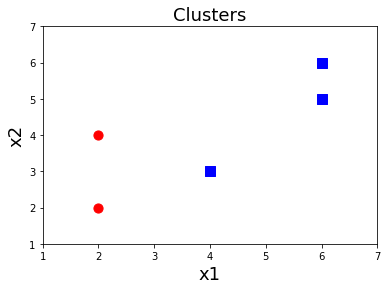

In [103]:
# Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

df1 = dataset[cluster==1]
df2 = dataset[cluster==2]

plt.scatter(df1.x1, df1.x2, marker='o', color='r', Label='Cluster 1', s=84)
plt.scatter(df2.x1, df2.x2, marker='s', color='b', Label='Cluster 2', s=84)

#plt.scatter(C1[0], C1[1], color='r', marker='o', label='Cluster 1', s=512, alpha=0.2)
#plt.scatter(C2[0], C2[1], color='b', marker='s', label='Cluster 2', s=512, alpha=0.2)

plt.title('Clusters', fontsize=18)
plt.xlabel('x1', fontsize=18)
plt.ylabel('x2', fontsize=18)
#plt.legend()

plt.xlim(1,7)
plt.ylim(1,7)

plt.show()

## 5: Compute the new centroid (mean) of each cluster

Compute the new centroid of each cluster

In [104]:
# Let's compute the 1st Centroid 
print(df1)

C1new = np.array([0., 0.]) # 1st Centroid

C1new[0] = df1.x1.mean()
C1new[1] = df1.x2.mean()

print(C1new)

   x1  x2
0   2   2
2   2   4
[2. 3.]


In [105]:
# Let's compute the 2nd Centroid 
print(df2)

C2new = np.array([0., 0.]) # 2nd Centroid

C2new[0] = df2.x1.mean()
C2new[1] = df2.x2.mean()

print(C2new)

   x1  x2
1   4   3
3   6   6
4   6   5
[5.33333333 4.66666667]


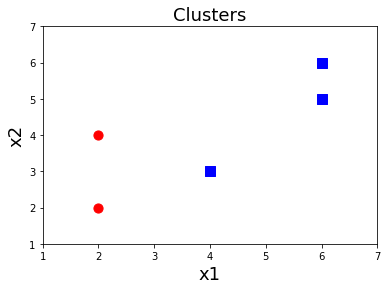

In [106]:
# Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

df1 = dataset[cluster==1]
df2 = dataset[cluster==2]

plt.scatter(df1.x1, df1.x2, marker='o', color='r', Label='Cluster 1', s=84)
plt.scatter(df2.x1, df2.x2, marker='s', color='b', Label='Cluster 2', s=84)

#plt.scatter(C1[0], C1[1], color='r', marker='o', label='Cluster 1', s=512, alpha=0.2)
#plt.scatter(C2[0], C2[1], color='b', marker='s', label='Cluster 2', s=512, alpha=0.2)

#plt.scatter(C1new[0], C1new[1], color='r', marker='o', label='Cluster 1', s=512, alpha=0.9)
#plt.scatter(C2new[0], C2new[1], color='b', marker='s', label='Cluster 2', s=512, alpha=0.9)

plt.title('Clusters', fontsize=18)
plt.xlabel('x1', fontsize=18)
plt.ylabel('x2', fontsize=18)
#plt.legend()

plt.xlim(1,7)
plt.ylim(1,7)

plt.show()

## 6: Until the centroids do not change 

If the centroids do not change, then, none of the data points change of the assigned cluster


In [107]:
print(C1)
print(C1new)

[1.5 3. ]
[2. 3.]


In [108]:
print(C2)
print(C2new)

[3. 3.]
[5.33333333 4.66666667]


#### If the centroids do change... go to 3 (recall to use the new centroids)

#### If the centroids do not change... done ¡¡